<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 300px;"/>

# Resolución de Ecuaciones Diferenciales Ordinarias

_¿Te acuerdas de todos esos esquemas numéricos para integrar ecuaciones diferenciales ordinarias? Es bueno saber que existen y qué peculiaridades tiene cada uno, pero en este curso no queremos implementar esos esquemas: queremos resolver las ecuaciones. Los problemas de evolución están por todas partes en ingeniería y son de los más divertidos de programar._

In [1]:
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Para integrar EDOs vamos a usar la función `odeint` del paquete `integrate`, que permite integrar sistemas del tipo:

$$ \frac{d\mathbf{y}}{dt}=\mathbf{f}\left(\mathbf{y},t\right)$$

con condiciones iniciales $\mathbf{y}(\mathbf{0}) = \mathbf{y_0}$.

<div class="alert alert-error">**¡Importante!**: La función del sistema recibe como primer argumento $\mathbf{y}$ (un array) y como segundo argumento el instante $t$ (un escalar). Esta convención va exactamente al revés que en MATLAB y si se hace al revés obtendremos errores o, lo que es peor, resultados incorrectos.</div>

In [3]:
from scipy.integrate import solve_ivp

Vamos a integrar primero una EDO elemental, cuya solución ya conocemos:

$$y' + y = 0$$

$$f(y, t) = \frac{dy}{dt} = -y$$

In [4]:
def f(t, y):
    return np.array([-y])

Condiciones iniciales:

In [5]:
y0 = np.array([1])

tini = 0
tfin = 3

Integramos y representamos la solución:

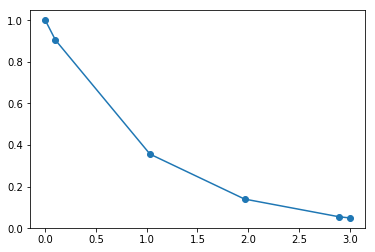

In [6]:
sol = solve_ivp(f, (tini, tfin), y0)

plt.plot(sol.t, sol.y[0, :], 'o-')

Pero, ¿cómo se han seleccionado los puntos en los que se calcula la solución? El solver los ha calculado por nosotros. Si queremos tener control sobre estos puntos, podemos pasar de manera explícita el vector de tiempos:

In [7]:
time = np.linspace(tini, tfin, 30)

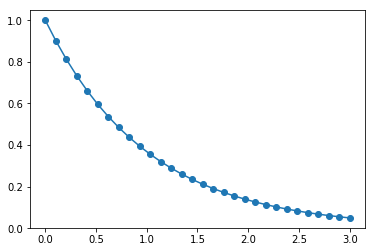

In [8]:
sol_2 = solve_ivp(f, (tini, tfin), y0, t_eval=time)

plt.plot(sol_2.t, sol_2.y[0, :], 'o-')

Probemos a pintar las dos soluciones anteriores, una encima de la otra:

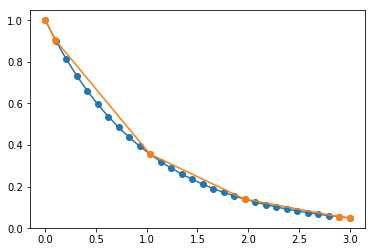

In [9]:
plt.plot(sol_2.t, sol_2.y[0, :], 'o-')
plt.plot(sol.t, sol.y[0, :], 'o-')

Podemos observar que a pesar de que en la primera se han usado muchos menos puntos, aquellos en los que se ha calculado la solución coinciden con el segundo resultado. Esto se debe a que, en realidad, el solver siempre da los pasos que considere necesarios para calcular la solución, pero sólo guarda los que nosotros le indicamos. Esto lo podemos ver del siguiente modo:

In [10]:
print(f"function evaluations in sol 1: {sol.nfev}")
print(f"function evaluations in sol 2: {sol_2.nfev}")

function evaluations in sol 1: 32
function evaluations in sol 2: 32


De hecho podemos usar la salida densa para obtener la solución en un punto cualquiera:

In [11]:
sol_3 = solve_ivp(f, (tini, tfin), y0, dense_output=True)

In [12]:
sol_3.sol(1.14567)

array([0.31820121])

In [13]:
t = np.linspace(tini, tfin, 45)
y = sol_3.sol(t)

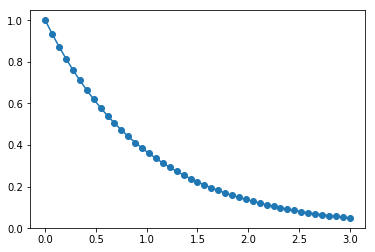

In [14]:
plt.plot(t, y[0, :], 'o-')

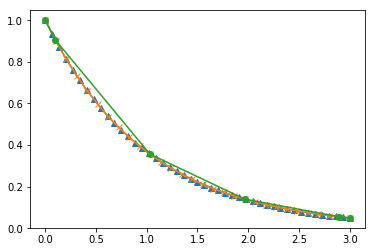

In [15]:
plt.plot(t, y[0, :], '^-')
plt.plot(sol_2.t, sol_2.y[0, :], 'x-')
plt.plot(sol.t, sol.y[0, :], 'o-')

### EDOs de orden superior

Tendremos que acordarnos ahora de cómo reducir las ecuaciones de orden. De nuevo, vamos a probar con un ejemplo académico:

$$y + y'' = 0$$

$$\mathbf{y} \leftarrow \pmatrix{y \\ y'}$$

$$\mathbf{f}(\mathbf{y}) = \frac{d\mathbf{y}}{dt} =  \pmatrix{y \\ y'}' = \pmatrix{y' \\ y''} = \pmatrix{y' \\ -y}$$

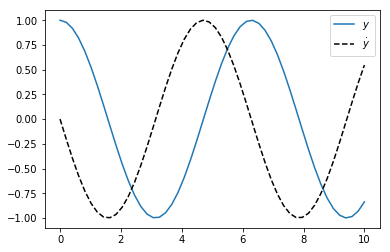

In [16]:
def f(t, y):
    return np.array([y[1], -y[0]])

t0 = 0
t1 = 10

t = np.linspace(t0, t1)
y0 = np.array([1.0, 0.0])

sol = solve_ivp(f, (t0, t1), y0, t_eval=t)

plt.plot(t, sol.y[0, :], label='$y$')
plt.plot(t, sol.y[1, :], '--k', label='$\dot{y}$')
plt.legend()

## Para ampliar

En nuestra edición anterior del curso de AeroPython puedes ver una aplicación muy interesante de lo que hemos visto hasta ahora al **salto de Felix Baumgartner**. ¡Aquí lo tienes!

http://nbviewer.ipython.org/github/AeroPython/Curso_AeroPython/blob/v1.0/Notebooks/Clase6b_Finale.ipynb

$$\displaystyle m \frac{d^2 y}{d t^2} = -m g + D$$

---
<br/>
#### <h4 align="right">¡Síguenos en Twitter!
<br/>
###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 
<br/>
###### Este notebook ha sido realizado por: Juan Luis Cano, y Álex Sáez 
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [17]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())